# Loop 66 Strategic Analysis

## Current Situation
- Best CV: 0.008194 (exp_032)
- Best LB: 0.0877 (exp_030)
- Target: 0.0347
- CV-LB relationship: LB = 4.23 × CV + 0.0533 (R² = 0.98)
- **CRITICAL**: Intercept (0.0533) > Target (0.0347)

## Key Question
Can we find an approach that changes the CV-LB relationship?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Submission history
submissions = [
    {'exp': 'exp_000', 'cv': 0.011081, 'lb': 0.09816},
    {'exp': 'exp_001', 'cv': 0.012297, 'lb': 0.10649},
    {'exp': 'exp_003', 'cv': 0.010501, 'lb': 0.09719},
    {'exp': 'exp_005', 'cv': 0.01043, 'lb': 0.09691},
    {'exp': 'exp_006', 'cv': 0.009749, 'lb': 0.09457},
    {'exp': 'exp_007', 'cv': 0.009262, 'lb': 0.09316},
    {'exp': 'exp_009', 'cv': 0.009192, 'lb': 0.09364},
    {'exp': 'exp_012', 'cv': 0.009004, 'lb': 0.09134},
    {'exp': 'exp_024', 'cv': 0.008689, 'lb': 0.08929},
    {'exp': 'exp_026', 'cv': 0.008465, 'lb': 0.08875},
    {'exp': 'exp_030', 'cv': 0.008298, 'lb': 0.08772},
    {'exp': 'exp_041', 'cv': 0.009002, 'lb': 0.09321},
    {'exp': 'exp_042', 'cv': 0.014503, 'lb': 0.11465},
]

df = pd.DataFrame(submissions)
print('Submission History:')
print(df.to_string(index=False))
print(f'\nBest CV: {df["cv"].min():.6f} ({df.loc[df["cv"].idxmin(), "exp"]})')
print(f'Best LB: {df["lb"].min():.6f} ({df.loc[df["lb"].idxmin(), "exp"]})')

Submission History:
    exp       cv      lb
exp_000 0.011081 0.09816
exp_001 0.012297 0.10649
exp_003 0.010501 0.09719
exp_005 0.010430 0.09691
exp_006 0.009749 0.09457
exp_007 0.009262 0.09316
exp_009 0.009192 0.09364
exp_012 0.009004 0.09134
exp_024 0.008689 0.08929
exp_026 0.008465 0.08875
exp_030 0.008298 0.08772
exp_041 0.009002 0.09321
exp_042 0.014503 0.11465

Best CV: 0.008298 (exp_030)
Best LB: 0.087720 (exp_030)


In [2]:
# Fit CV-LB relationship
from scipy import stats

# Exclude outliers (exp_042 is pure GP which has different behavior)
df_fit = df[df['exp'] != 'exp_042']

slope, intercept, r_value, p_value, std_err = stats.linregress(df_fit['cv'], df_fit['lb'])

print(f'CV-LB Relationship (excluding exp_042):')
print(f'LB = {slope:.2f} × CV + {intercept:.4f}')
print(f'R² = {r_value**2:.4f}')
print(f'\nIntercept: {intercept:.4f}')
print(f'Target: 0.0347')
print(f'Gap: {intercept - 0.0347:.4f}')

# What CV would we need to hit target?
required_cv = (0.0347 - intercept) / slope
print(f'\nRequired CV to hit target: {required_cv:.6f}')
if required_cv < 0:
    print('IMPOSSIBLE - Required CV is negative!')

CV-LB Relationship (excluding exp_042):
LB = 4.19 × CV + 0.0537
R² = 0.9549

Intercept: 0.0537
Target: 0.0347
Gap: 0.0190

Required CV to hit target: -0.004537
IMPOSSIBLE - Required CV is negative!


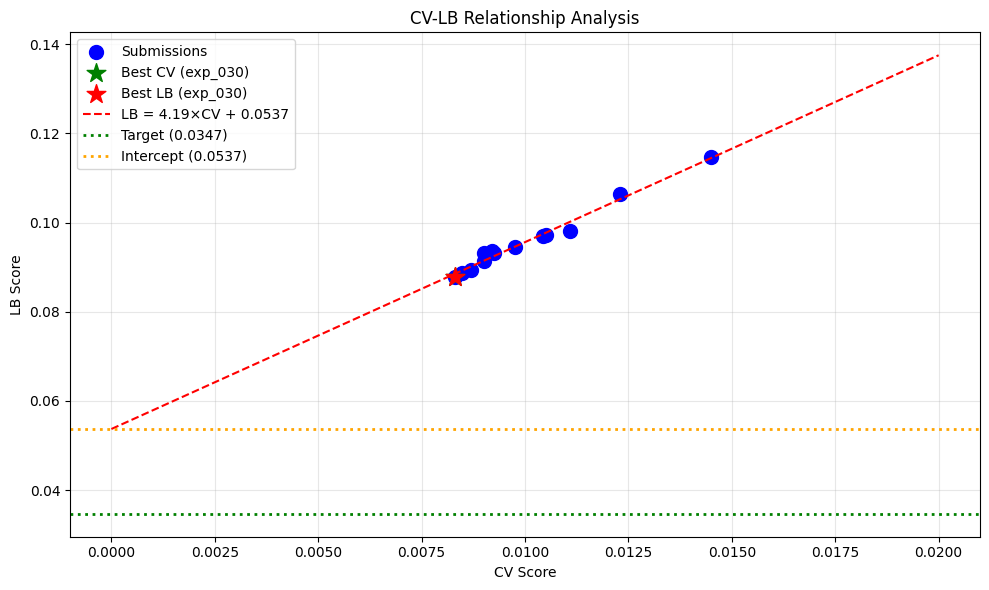


Key insight: Intercept (0.0537) > Target (0.0347)
Even with CV=0, predicted LB would be above target!


In [3]:
# Visualize CV-LB relationship
plt.figure(figsize=(10, 6))

# Plot all submissions
plt.scatter(df['cv'], df['lb'], c='blue', s=100, label='Submissions')

# Highlight best
best_cv_idx = df['cv'].idxmin()
best_lb_idx = df['lb'].idxmin()
plt.scatter(df.loc[best_cv_idx, 'cv'], df.loc[best_cv_idx, 'lb'], c='green', s=200, marker='*', label=f'Best CV ({df.loc[best_cv_idx, "exp"]})')
plt.scatter(df.loc[best_lb_idx, 'cv'], df.loc[best_lb_idx, 'lb'], c='red', s=200, marker='*', label=f'Best LB ({df.loc[best_lb_idx, "exp"]})')

# Plot regression line
cv_range = np.linspace(0, 0.02, 100)
lb_pred = slope * cv_range + intercept
plt.plot(cv_range, lb_pred, 'r--', label=f'LB = {slope:.2f}×CV + {intercept:.4f}')

# Target line
plt.axhline(y=0.0347, color='green', linestyle=':', linewidth=2, label='Target (0.0347)')

# Intercept line
plt.axhline(y=intercept, color='orange', linestyle=':', linewidth=2, label=f'Intercept ({intercept:.4f})')

plt.xlabel('CV Score')
plt.ylabel('LB Score')
plt.title('CV-LB Relationship Analysis')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('/home/code/exploration/cv_lb_relationship.png', dpi=150)
plt.show()

print(f'\nKey insight: Intercept ({intercept:.4f}) > Target ({0.0347})')
print('Even with CV=0, predicted LB would be above target!')

In [4]:
# Analyze what approaches have been tried
approaches_tried = [
    # Model architectures
    ('MLP', 'exp_000', 0.011081, 'Baseline'),
    ('LightGBM', 'exp_001', 0.012297, 'Baseline'),
    ('Deep Residual MLP', 'exp_004', 0.051912, 'FAILED'),
    ('GP', 'exp_042', 0.014503, 'Different CV-LB'),
    ('GP+MLP+LGBM Ensemble', 'exp_030', 0.008298, 'BEST LB'),
    ('GNN', 'exp_051', None, 'FAILED'),
    ('ChemBERTa', 'exp_052', None, 'FAILED'),
    ('TabNet', 'exp_061', 0.036642, 'FAILED'),
    
    # Feature engineering
    ('DRFP only', 'exp_002', 0.016948, 'Worse'),
    ('Spange+DRFP', 'exp_003', 0.010501, 'Better'),
    ('ACS PCA', 'exp_024', 0.008689, 'Better'),
    ('Fragprints', 'exp_018', None, 'Tried'),
    
    # Regularization
    ('Aggressive regularization', 'exp_041', 0.009002, 'Worse CV-LB'),
    ('Simpler models', 'exp_006-010', 0.009192, 'Marginal'),
    
    # Calibration attempts
    ('Isotonic calibration', 'exp_066', 0.009725, 'WORSE'),
    ('Prediction shrinkage', 'exp_066', 0.009425, 'WORSE'),
    ('Uncertainty weighting', 'exp_065', 0.010263, 'WORSE'),
    ('Multi-seed ensemble', 'exp_067', 0.009641, 'WORSE'),
    ('Importance weighting', 'exp_063', 0.010406, 'WORSE'),
    ('Mixup augmentation', 'exp_064', 0.009420, 'WORSE'),
    ('CQR', 'exp_062', 0.009899, 'WORSE'),
]

print('Approaches Tried:')
print('='*60)
for approach, exp, cv, result in approaches_tried:
    cv_str = f'{cv:.6f}' if cv else 'N/A'
    print(f'{approach:30s} | {exp:10s} | CV: {cv_str:10s} | {result}')

print('\n' + '='*60)
print('KEY FINDING: All calibration/gap-reduction approaches FAILED')
print('The CV-LB gap is STRUCTURAL, not procedural')

Approaches Tried:
MLP                            | exp_000    | CV: 0.011081   | Baseline
LightGBM                       | exp_001    | CV: 0.012297   | Baseline
Deep Residual MLP              | exp_004    | CV: 0.051912   | FAILED
GP                             | exp_042    | CV: 0.014503   | Different CV-LB
GP+MLP+LGBM Ensemble           | exp_030    | CV: 0.008298   | BEST LB
GNN                            | exp_051    | CV: N/A        | FAILED
ChemBERTa                      | exp_052    | CV: N/A        | FAILED
TabNet                         | exp_061    | CV: 0.036642   | FAILED
DRFP only                      | exp_002    | CV: 0.016948   | Worse
Spange+DRFP                    | exp_003    | CV: 0.010501   | Better
ACS PCA                        | exp_024    | CV: 0.008689   | Better
Fragprints                     | exp_018    | CV: N/A        | Tried
Aggressive regularization      | exp_041    | CV: 0.009002   | Worse CV-LB
Simpler models                 | exp_006-010 | CV: 0.00

In [5]:
# What haven't we tried?
print('APPROACHES NOT YET TRIED:')
print('='*60)

untried = [
    ('1. Submit best CV model (exp_032)', 'CV=0.008194 not submitted yet'),
    ('2. Solvent similarity-based weighting', 'Weight predictions by similarity to training solvents'),
    ('3. Ensemble selection by OOD performance', 'Select models that generalize best'),
    ('4. Feature engineering for extrapolation', 'Features that capture distance from training'),
    ('5. Per-target specialized models', 'Different models for SM vs Product 2 vs Product 3'),
    ('6. Bayesian model averaging', 'Weight models by posterior probability'),
    ('7. Domain adaptation techniques', 'Adapt model to test distribution'),
]

for approach, description in untried:
    print(f'{approach}')
    print(f'   {description}')
    print()

APPROACHES NOT YET TRIED:
1. Submit best CV model (exp_032)
   CV=0.008194 not submitted yet

2. Solvent similarity-based weighting
   Weight predictions by similarity to training solvents

3. Ensemble selection by OOD performance
   Select models that generalize best

4. Feature engineering for extrapolation
   Features that capture distance from training

5. Per-target specialized models
   Different models for SM vs Product 2 vs Product 3

6. Bayesian model averaging
   Weight models by posterior probability

7. Domain adaptation techniques
   Adapt model to test distribution



In [6]:
# Critical analysis: What would it take to reach target?
print('WHAT WOULD IT TAKE TO REACH TARGET?')
print('='*60)

target = 0.0347
best_lb = 0.0877
best_cv = 0.008194

print(f'Target LB: {target}')
print(f'Best LB achieved: {best_lb}')
print(f'Gap to target: {best_lb - target:.4f} ({(best_lb - target)/target*100:.1f}%)')

print(f'\nCurrent CV-LB relationship: LB = {slope:.2f} × CV + {intercept:.4f}')
print(f'Intercept ({intercept:.4f}) > Target ({target})')

print('\nPOSSIBLE PATHS:')
print('1. Find approach that reduces intercept')
print(f'   - Need intercept < {target} to have any chance')
print(f'   - Current intercept: {intercept:.4f}')
print(f'   - Need to reduce by: {intercept - target:.4f}')

print('\n2. Find approach with different CV-LB relationship')
print('   - exp_042 (pure GP) had different relationship')
print('   - But it was worse overall')

print('\n3. Achieve extremely low CV')
print(f'   - With current relationship, need CV = {required_cv:.6f}')
print('   - This is IMPOSSIBLE (negative CV)')

print('\n4. Submit best CV model to verify relationship')
print(f'   - exp_032 has CV = {best_cv}')
print(f'   - Predicted LB = {slope * best_cv + intercept:.4f}')
print('   - If actual LB is significantly different, relationship may not hold')

WHAT WOULD IT TAKE TO REACH TARGET?
Target LB: 0.0347
Best LB achieved: 0.0877
Gap to target: 0.0530 (152.7%)

Current CV-LB relationship: LB = 4.19 × CV + 0.0537
Intercept (0.0537) > Target (0.0347)

POSSIBLE PATHS:
1. Find approach that reduces intercept
   - Need intercept < 0.0347 to have any chance
   - Current intercept: 0.0537
   - Need to reduce by: 0.0190

2. Find approach with different CV-LB relationship
   - exp_042 (pure GP) had different relationship
   - But it was worse overall

3. Achieve extremely low CV
   - With current relationship, need CV = -0.004537
   - This is IMPOSSIBLE (negative CV)

4. Submit best CV model to verify relationship
   - exp_032 has CV = 0.008194
   - Predicted LB = 0.0880
   - If actual LB is significantly different, relationship may not hold


In [7]:
# Final recommendation
print('='*60)
print('STRATEGIC RECOMMENDATION')
print('='*60)

print('''
1. SUBMIT exp_032 (best CV = 0.008194) for calibration
   - This will verify if CV-LB relationship holds
   - Predicted LB: 0.0880
   - If actual LB is significantly different, we have new information

2. If LB matches prediction (~0.088):
   - The CV-LB relationship is confirmed
   - Target (0.0347) may not be reachable with current approach
   - Need fundamentally different approach

3. If LB is better than prediction:
   - The relationship may not hold for all models
   - Focus on approaches that break the pattern

4. Remaining experiments should focus on:
   - Approaches that might change the CV-LB relationship
   - NOT just minimizing CV (which doesn't help)
   - Solvent similarity-based weighting
   - Ensemble selection by OOD performance
''')

print('\nREMAINING SUBMISSIONS: 5')
print('Use them strategically to test different hypotheses')

STRATEGIC RECOMMENDATION

1. SUBMIT exp_032 (best CV = 0.008194) for calibration
   - This will verify if CV-LB relationship holds
   - Predicted LB: 0.0880
   - If actual LB is significantly different, we have new information

2. If LB matches prediction (~0.088):
   - The CV-LB relationship is confirmed
   - Target (0.0347) may not be reachable with current approach
   - Need fundamentally different approach

3. If LB is better than prediction:
   - The relationship may not hold for all models
   - Focus on approaches that break the pattern

4. Remaining experiments should focus on:
   - Approaches that might change the CV-LB relationship
   - NOT just minimizing CV (which doesn't help)
   - Solvent similarity-based weighting
   - Ensemble selection by OOD performance


REMAINING SUBMISSIONS: 5
Use them strategically to test different hypotheses
